In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from pval_qqplot import *

/home/omics/anaconda2/envs/haeun/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/omics/anaconda2/envs/haeun/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/omics/anaconda2/envs/haeun/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/omics/anaconda2/envs/haeun/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/omics/anaconda2/envs/haeun/lib/py

In [15]:
cancer_type = 'PRAD'
tissue_type = 'Tumor'

In [16]:
df = pd.read_csv('~/DATA0/Hyoeun/spliceQTL/Tools/FastQTL/SI_QTL/{0}/{1}/add_cov_nomi_result'.format('Normal', cancer_type), 
                 sep=' ', header=None, index_col=1, names=['QTL', 'rs_id', 'drop', 'pval', 'effect_size'])
df = df.drop('drop', axis=1)

In [17]:
shared_path = '~/DATA1/Hyoeun/spliceQTL/QTLset'
gwas = pd.read_csv('~/DATA1/Hyoeun/spliceQTL/Analysis/00_GWAS.Input/{0}_GWAS.hg38.BASE.OR.uniq.assoc'.format(cancer_type),
                   sep='\t', header=0, index_col=0)
#eqtl = pd.read_csv('{0}/eQTL/shared/v2_unique.{1}.{2}_merged.txt'.format(shared_path, cancer_type, tissue_type),
#                   sep=' ', header=None, index_col=1).index
#sqtl = pd.read_csv('{0}/shared/v2_unique.{1}.{2}_merged.txt'.format(shared_path, cancer_type, tissue_type),
#                   sep=' ', header=None, index_col=1).index
#tuqtl = pd.read_csv('{0}/tuQTL/shared/v2_unique.{1}.{2}_merged.txt'.format(shared_path, cancer_type, tissue_type),
#                    sep=' ', header=None, index_col=1).index

In [18]:
gwas = gwas[gwas['P'] < 5 * 10**(-8)].index

In [19]:
tuqtl.shape

NameError: name 'tuqtl' is not defined

In [20]:
binsize = 100
sorted_df = df.sort_values(by=['pval']).reset_index()
bins = pd.cut(sorted_df.index, bins=int(sorted_df.shape[0] / binsize))
binned_pval = sorted_df.groupby(bins).mean()['pval']

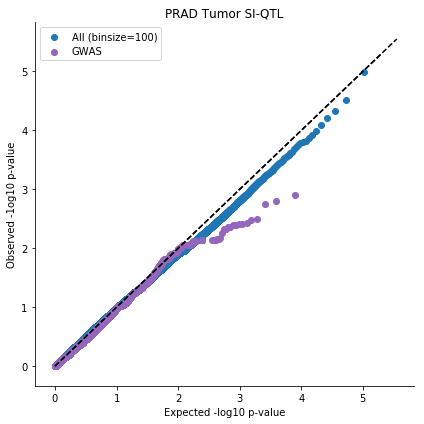

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
pval_qqplot(binned_pval, ax=ax, label='All (binsize=100)')
#pval_qqplot(df.loc[np.intersect1d(df.index, eqtl), 'pval'], ax=ax, label='eQTL')
#pval_qqplot(df.loc[np.intersect1d(df.index, sqtl), 'pval'], ax=ax, label='sQTL')
#pval_qqplot(df.loc[np.intersect1d(df.index, tuqtl), 'pval'], ax=ax, label='tuQTL')
pval_qqplot(df.loc[np.intersect1d(df.index, gwas), 'pval'], ax=ax, label='GWAS', color='C4')
ax.legend()
ax.set_title('{0} {1} SI-QTL'.format(cancer_type, tissue_type))
sns.despine()
fig.tight_layout()
plt.show()

In [22]:
fig.savefig('../data/Analysis/SI-QTL/20181001/{0}_{1}.SI_QTL.qqplot.png'.format(cancer_type, tissue_type))
fig.savefig('../data/Analysis/SI-QTL/20181001/{0}_{1}.SI_QTL.qqplot.pdf'.format(cancer_type, tissue_type))

In [64]:
sns.distplot(df.loc[np.intersect1d(df.index, eqtl), 'pval'])
sns.distplot(df.loc[np.intersect1d(df.index, sqtl), 'pval'])
sns.distplot(df.loc[np.intersect1d(df.index, tuqtl), 'pval'])

KeyboardInterrupt: 

In [145]:
mRNAsi_type = 'mRNAsi'

In [146]:
df = pd.read_csv('../05_Merged_output/GTEx_TOIL_white_MetaTissue.{0}.SI-QTL.txt'.format(mRNAsi_type), sep='\t', header=0, index_col=0)

In [140]:
with open('../05_Merged_output/GTEx_TOIL_white_MetaTissue.{0}.SI-QTL.txt'.format(mRNAsi_type), 'r') as f:
    header = f.readline().strip().split('\t')

In [141]:
df = df.iloc[:, :-1]
df.columns = header[1:]
df = df.dropna()
df = df.astype('float64')
df = df[df['PVALUE_RE2'] > 0]

In [142]:
binsize = 100
sorted_df = df.sort_values(by=['PVALUE_RE2']).reset_index()
bins = pd.cut(sorted_df.index, bins=int(sorted_df.shape[0] / binsize))
binned_pval = sorted_df.groupby(bins).mean()['PVALUE_RE2']

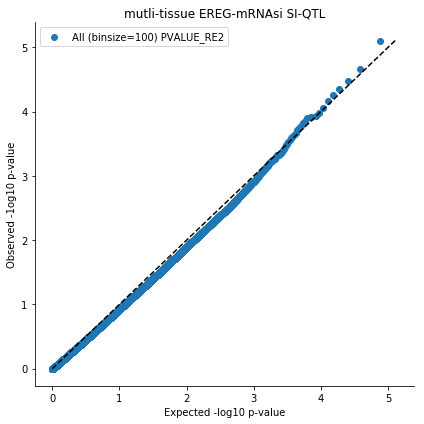

In [115]:
fig, ax = plt.subplots(figsize=(6, 6))
pval_qqplot(binned_pval.values, ax=ax, label='All (binsize=100) PVALUE_RE2')
ax.legend()
ax.set_title('{0} {1} SI-QTL'.format('mutli-tissue', mRNAsi_type))
sns.despine()
fig.tight_layout()
plt.show()

In [116]:
fig.savefig('../GTEx_TOIL_white_MetaTissue.{0}.qqplot.png'.format(mRNAsi_type))
fig.savefig('../GTEx_TOIL_white_MetaTissue.{0}.qqplot.pdf'.format(mRNAsi_type))

In [143]:
from statsmodels.stats import multitest

rejected, qvals, _1, _2 = multitest.multipletests(df['PVALUE_FE'].values, alpha=0.2, method='fdr_bh')

In [144]:
rejected[rejected==True].shape

(172,)

In [136]:
df.iloc[np.argsort(qvals)[:50], :]

,NUM_STUDY,PVALUE_FE,BETA_FE,STD_FE,PVALUE_RE,BETA_RE,STD_RE,PVALUE_RE2,STAT1_RE2,STAT2_RE2,...,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
rs189099138:EREG-mRNAsi,12.0,0.000063,0.780031,0.194963,0.000063,0.780031,0.194963,0.000121,0.0,0.0,...,0.790,0.879,0.928,0.891,0.878,0.741,0.847,0.886,0.828,0.779
rs72845062:EREG-mRNAsi,12.0,0.000023,-0.513746,0.121486,0.000023,-0.513746,0.121486,0.000046,0.0,0.0,...,0.899,0.961,0.915,0.890,0.794,0.905,0.910,0.737,0.938,0.897
rs186412349:EREG-mRNAsi,12.0,0.000063,0.780031,0.194963,0.000063,0.780031,0.194963,0.000121,0.0,0.0,...,0.790,0.879,0.928,0.891,0.878,0.741,0.847,0.886,0.828,0.779
rs141065561:EREG-mRNAsi,12.0,0.000023,-0.513746,0.121486,0.000023,-0.513746,0.121486,0.000046,0.0,0.0,...,0.899,0.961,0.915,0.890,0.794,0.905,0.910,0.737,0.938,0.897
rs72845064:EREG-mRNAsi,12.0,0.000023,-0.513746,0.121486,0.000023,-0.513746,0.121486,0.000046,0.0,0.0,...,0.899,0.961,0.915,0.890,0.794,0.905,0.910,0.737,0.938,0.897
rs144750836:EREG-mRNAsi,12.0,0.000063,0.780031,0.194963,0.000063,0.780031,0.194963,0.000121,0.0,0.0,...,0.790,0.879,0.928,0.891,0.878,0.741,0.847,0.886,0.828,0.779
rs141690896:EREG-mRNAsi,12.0,0.000023,-0.513746,0.121486,0.000023,-0.513746,0.121486,0.000046,0.0,0.0,...,0.899,0.961,0.915,0.890,0.794,0.905,0.910,0.737,0.938,0.897
rs189786531:EREG-mRNAsi,12.0,0.000063,0.780031,0.194963,0.000063,0.780031,0.194963,0.000121,0.0,0.0,...,0.790,0.879,0.928,0.891,0.878,0.741,0.847,0.886,0.828,0.779
rs72845896:EREG-mRNAsi,12.0,0.000023,-0.513746,0.121486,0.000023,-0.513746,0.121486,0.000046,0.0,0.0,...,0.899,0.961,0.915,0.890,0.794,0.905,0.910,0.737,0.938,0.897
rs138534231:EREG-mRNAsi,12.0,0.000063,0.780031,0.194963,0.000063,0.780031,0.194963,0.000121,0.0,0.0,...,0.790,0.879,0.928,0.891,0.878,0.741,0.847,0.886,0.828,0.779


In [108]:
(df.iloc[np.argsort(qvals)[:50], -12:] > 0.9).agg(np.any, axis=1)

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
rs144492765:mRNAsi,False,False,False,False,False,False,False,False,False,False,False,False
rs118058347:mRNAsi,False,False,False,False,False,False,False,False,False,False,False,False
rs1513729:mRNAsi,True,True,True,True,True,True,True,True,True,True,False,True
rs6879988:mRNAsi,False,False,False,False,False,False,False,False,False,False,False,False
rs3097614:mRNAsi,False,False,False,False,False,False,False,False,False,False,False,False
rs11743638:mRNAsi,False,False,False,False,False,False,False,False,False,False,False,False
rs80129243:mRNAsi,False,False,False,False,False,False,False,False,False,False,False,False
rs13182298:mRNAsi,False,False,False,False,False,False,False,False,False,False,False,False
rs9529300:mRNAsi,True,True,True,True,True,True,True,True,True,True,True,True
rs11741665:mRNAsi,False,False,False,False,False,False,False,False,False,False,False,False


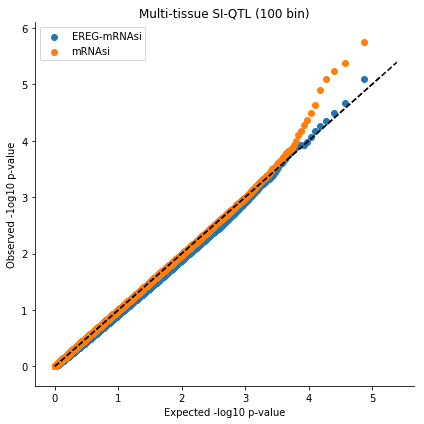

In [137]:
fig, ax = plt.subplots(figsize=(6, 6))
for mRNAsi_type in ['EREG-mRNAsi', 'mRNAsi']:
    df = pd.read_csv('../05_Merged_output/GTEx_TOIL_white_MetaTissue.{0}.SI-QTL.txt'.format(mRNAsi_type), 
                     sep='\t', header=0, index_col=0)
    with open('../05_Merged_output/GTEx_TOIL_white_MetaTissue.{0}.SI-QTL.txt'.format(mRNAsi_type), 'r') as f:
        header = f.readline().strip().split('\t')
    df = df.iloc[:, :-1]
    df.columns = header[1:]
    df = df.dropna()
    df = df.astype('float64')
    df = df[df['PVALUE_RE2'] > 0]
    binsize = 100
    sorted_df = df.sort_values(by=['PVALUE_RE2']).reset_index()
    bins = pd.cut(sorted_df.index, bins=int(sorted_df.shape[0] / binsize))
    binned_pval = sorted_df.groupby(bins).mean()['PVALUE_RE2']

    pval_qqplot(binned_pval.values, ax=ax, label=mRNAsi_type)
ax.legend()
ax.set_title('Multi-tissue SI-QTL (100 bin)')
sns.despine()
fig.tight_layout()
plt.show()

In [40]:
fig.savefig('../GTEx_TOIL_white_MetaTissue.qqplot.png')
fig.savefig('../GTEx_TOIL_white_MetaTissue.qqplot.pdf')